In [61]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import os
import re
import shutil
# import string
# import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.stem.porter import PorterStemmer
# from nltk.stem.snowball import SnowballStemmer
# from nltk.stem.wordnet import WordNetLemmatizer
# import re
import collections
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from sklearn.model_selection import train_test_split
from keras.callbacks import TensorBoard
from sklearn.decomposition import TruncatedSVD
from sklearn_pipeline import *
from list_to_corpus import *
from helper import *
from sklearn_eval import *
from NLP_emb_lstm import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
train_df=pd.read_csv('../data/processed_train.csv')
test_df=pd.read_csv('../data/processed_test.csv')
word_max_features=500
keyword_max_features=100
location_max_features=100
url_max_features=100
train_X_augmented, test_X_augmented, train_target = train_test_augmented(train_df, test_df, word_max_features, keyword_max_features, location_max_features, url_max_features)
# train_X_augmented.shape, test_X_augmented.shape, train_target.shape

In [63]:
train_X_augmented

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.]])

## Embedding Model (only text features)

In [256]:
# embedding_dim = 128
# max_features = 399
# embedding_model = embedding(embedding_dim, max_features)
# embedding_model.summary()

## Embedding model (all features)

In [4]:
test_df

,id,text,modified_keyword,modified_location,url_count,urls,emoji_count
0,0,Our Deeds are the Reason of this #earthquake M...,uns_keyword,uns_location,0,uns_url,0
1,2,Forest fire near La Ronge Sask. Canada,uns_keyword,uns_location,0,uns_url,0
2,3,All residents asked to 'shelter in place' are ...,uns_keyword,uns_location,0,uns_url,0
3,9,"13,000 people receive #wildfires evacuation or...",uns_keyword,uns_location,0,uns_url,0
4,11,Just got sent this photo from Ruby #Alaska as ...,uns_keyword,uns_location,0,uns_url,0
...,...,...,...,...,...,...,...
3258,10861,Do you feel engulfed with low self-image? Take...,uns_keyword,uns_location,0,uns_url,0
3259,10865,Man is equally incapable of seeing the nothing...,uns_keyword,uns_location,0,uns_url,0
3260,10868,Fully Engulfed Garage Fire: Propane Tanks Insi...,uns_keyword,uns_location,1,http://t.co/UtbXLcBIuY,0
3261,10874,He came to a land which was engulfed in tribal...,uns_keyword,uns_location,1,http://t.co/3X6RBQJHn3,0


In [5]:
# from model import *
# embedding_dim = 128
# # max_features = 399
embedding_model =  NLP_emb_lstm(train_X_augmented, train_target.values, embedding_dim) 

NameError: name 'embedding_dim' is not defined

In [278]:
embedding_model.fit()

381/381 [==============================] - 245s 644ms/step - loss: 0.6773 - ACCURACY: 0.5787 - PRECISION: 0.5787 - RECALL: 0.5787 - F1Score: 0.5787 - val_loss: 0.6776 - val_ACCURACY: 0.5332 - val_PRECISION: 0.5332 - val_RECALL: 0.5332 - val_F1Score: 0.5332


In [174]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
history_augmented = embedding_model.fit(train_X_augmented, train_target.values, verbose=1, batch_size = 16, epochs = 10, validation_split=0.2,
                   shuffle=True, callbacks=[tensorboard_callback])

Epoch 1/10
381/381 [==============================] - 467s 1s/step - loss: 0.6760 - ACCURACY: 0.5791 - val_loss: 0.6782 - val_ACCURACY: 0.5332
Epoch 2/10
381/381 [==============================] - 552s 1s/step - loss: 0.6725 - ACCURACY: 0.5913 - val_loss: 0.6755 - val_ACCURACY: 0.6264
Epoch 3/10
381/381 [==============================] - 468s 1s/step - loss: 0.6719 - ACCURACY: 0.5966 - val_loss: 0.6712 - val_ACCURACY: 0.6264
Epoch 4/10
381/381 [==============================] - 341s 894ms/step - loss: 0.6720 - ACCURACY: 0.5969 - val_loss: 0.6697 - val_ACCURACY: 0.6264
Epoch 5/10
381/381 [==============================] - 325s 852ms/step - loss: 0.6718 - ACCURACY: 0.5966 - val_loss: 0.6693 - val_ACCURACY: 0.6264
Epoch 6/10
381/381 [==============================] - 293s 769ms/step - loss: 0.6716 - ACCURACY: 0.5966 - val_loss: 0.6701 - val_ACCURACY: 0.6264
Epoch 7/10
381/381 [==============================] - 319s 838ms/step - loss: 0.6716 - ACCURACY: 0.5967 - val_loss: 0.6681 - val_ACCU

In [165]:
train_X_augmented.shape, test_X_augmented.shape

((7613, 802), (3263, 802))

In [172]:
(train_target.values.shape)

(7613,)

In [173]:
np.mean(train_target.values)

0.4296597924602653

In [175]:
np.unique(embedding_model.predict(test_X_augmented))

array([0.3829118 , 0.38291183, 0.42483768, 0.42483896, 0.424839  ,
       0.4460717 , 0.44644988, 0.4476785 , 0.44768584, 0.44770768,
       0.44770807, 0.44770855, 0.44770905, 0.4477091 , 0.44770935,
       0.484561  , 0.48474646, 0.48580647, 0.4889468 , 0.5458863 ,
       0.5458873 , 0.5773099 ], dtype=float32)

In [205]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
embedding_model.save('saved_model/embedding_model1')

INFO:tensorflow:Assets written to: saved_model/embedding_model1/assets


# Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [51]:
clf = BernoulliNB()

accuracy: 0.762967826657912, precision: 0.7356115107913669, recall: 0.6565008025682183, f1_score: 0.6938083121289228


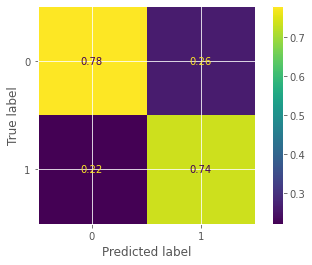

In [52]:
eval(clf,train_X_augmented,  train_target, 0.2)

# SVD

In [77]:
tSVD = TruncatedSVD(n_components=3)
data_3d = tSVD.fit_transform(train_X_augmented)

svd_df = pd.DataFrame()
svd_df['svd_one'] = data_3d[:, 0]
svd_df['svd_two'] = data_3d[:, 1]
svd_df['svd_three'] = data_3d[:, 2]

In [78]:
svd_df

,svd_one,svd_two,svd_three
0,1.430817,-0.850153,-0.530098
1,1.434142,-0.849623,-0.527982
2,1.426594,-0.848670,-0.533843
3,1.434993,-0.844842,-0.529407
4,1.432742,-0.849979,-0.532442
...,...,...,...
7608,1.433137,-0.846794,-0.529873
7609,1.434812,-0.847105,-0.529571
7610,2.001495,1.309364,-0.550633
7611,1.433781,-0.847962,-0.528862


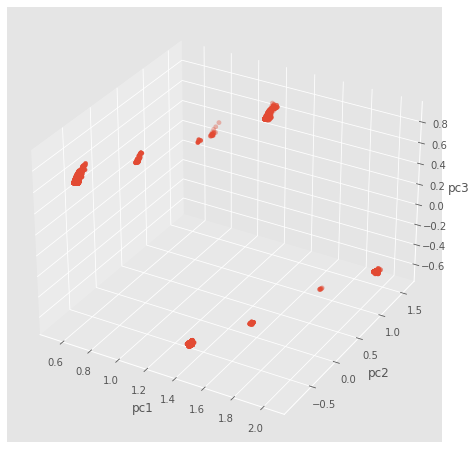

In [79]:
from matplotlib import cm
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(15,8))
ax = fig.gca(projection='3d')
ax.scatter(svd_df.svd_one, svd_df.svd_two, svd_df.svd_three, cmap=cm.coolwarm, linewidth=0.2)
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')
plt.show()

## Random Forest

accuracy: 0.7767564018384767, precision: 0.7858585858585858, recall: 0.6243980738362761, f1_score: 0.6958855098389982


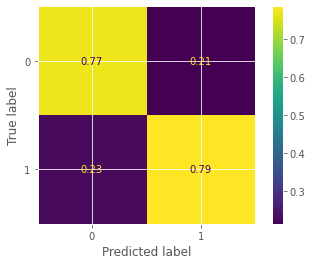

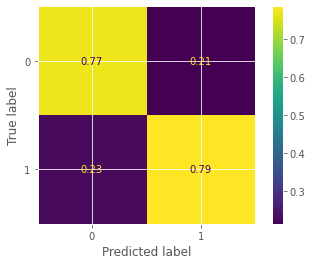

In [64]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=100, random_state=0)
eval(clf, train_X_augmented, train_target, 0.2)

# Gradient Boosting

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
%%time
N_ESTIMATORS = 2000

model = GradientBoostingClassifier(learning_rate=0.001, 
                                   n_estimators=N_ESTIMATORS, 
                                   min_samples_leaf=10)
# eval(model, train_X_augmented, train_target, 0.2)

CPU times: user 2.87 ms, sys: 48 µs, total: 2.92 ms
Wall time: 3.26 ms


In [60]:
(model.__class__)==GradientBoostingClassifier

True

[autoreload of model failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  File "<frozen importlib._bootstr

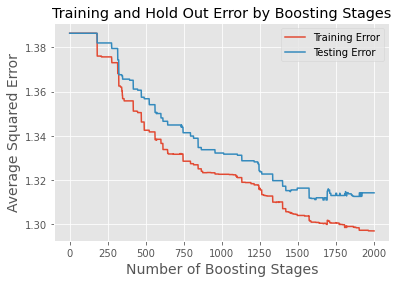

In [245]:
train_score = np.zeros(N_ESTIMATORS)
for i, y_pred in enumerate(model.staged_predict(X_train)):
    train_score[i] = model.loss_(y_train, y_pred)

test_score = np.zeros(N_ESTIMATORS)
for i, y_pred in enumerate(model.staged_predict(X_test)):
    test_score[i] = model.loss_(y_test, y_pred)
    
plt.plot(np.arange(N_ESTIMATORS) + 1, train_score,
        label="Training Error")
plt.plot(np.arange(N_ESTIMATORS) + 1, test_score,
        label="Testing Error")
plt.title("Training and Hold Out Error by Boosting Stages")
plt.xlabel('Number of Boosting Stages', fontsize=14)
plt.ylabel('Average Squared Error', fontsize=14)
plt.legend(loc="upper right")

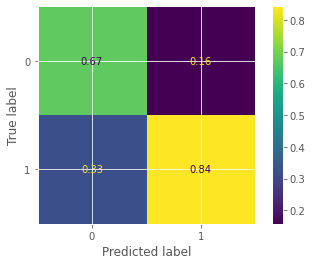

In [213]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
accuracy = accuracy_score(y_test, y_pred, normalize=True)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
accuracy, precision, recall, f1_score

(0.7019041365725541,
 0.8421052631578947,
 0.33386837881219905,
 0.47816091954022993)

# Grid Search

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
#creating Scoring parameter: 
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),'recall':make_scorer(recall_score)}


In [138]:
from boosting_parameters import *

In [139]:
parameters = boosting_parameters()

In [140]:
parameters

{'learning_rate': [0.5], 'subsample': [0.75], 'n_estimators': [10]}

In [143]:
clf = GridSearchCV(GradientBoostingClassifier(), parameters,scoring=scoring, refit='accuracy', cv=2, n_jobs=-1)

In [144]:
%%timeit
clf.fit(X_train, y_train)
#converting the clf.cv_results to dataframe
# df=pd.DataFrame.from_dict(clf.cv_results_)
#here Possible inputs for cross validation is cv=2, there two split split0 and split1
# df[['split0_test_accuracy','split1_test_accuracy','split0_test_precision','split1_test_precision','split0_test_recall','split1_test_recall']]

4.68 s ± 694 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [126]:
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_learning_rate,param_loss,param_n_estimators,param_subsample,params,...,split0_test_precision,split1_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,0.390499,0.009965,0.0,0.0,recall,0.005,deviance,300,0.75,"{'criterion': 'recall', 'learning_rate': 0.005...",...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1
1,0.269621,0.129705,0.0,0.0,precision,0.005,deviance,300,0.75,"{'criterion': 'precision', 'learning_rate': 0....",...,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mean_fit_time          2 non-null      float64
 1   std_fit_time           2 non-null      float64
 2   mean_score_time        2 non-null      float64
 3   std_score_time         2 non-null      float64
 4   param_criterion        2 non-null      object 
 5   param_learning_rate    2 non-null      object 
 6   param_loss             2 non-null      object 
 7   param_n_estimators     2 non-null      object 
 8   param_subsample        2 non-null      object 
 9   params                 2 non-null      object 
 10  split0_test_accuracy   0 non-null      float64
 11  split1_test_accuracy   0 non-null      float64
 12  mean_test_accuracy     0 non-null      float64
 13  std_test_accuracy      0 non-null      float64
 14  rank_test_accuracy     2 non-null      int32  
 15  split0_tes

In [146]:
clf.cv_results_

{'mean_fit_time': array([1.61244297]),
 'std_fit_time': array([0.01522088]),
 'mean_score_time': array([0.04959655]),
 'std_score_time': array([0.00352859]),
 'param_learning_rate': masked_array(data=[0.5],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_subsample': masked_array(data=[0.75],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.5, 'n_estimators': 10, 'subsample': 0.75}],
 'split0_test_accuracy': array([0.71888342]),
 'split1_test_accuracy': array([0.72151067]),
 'mean_test_accuracy': array([0.72019704]),
 'std_test_accuracy': array([0.00131363]),
 'rank_test_accuracy': array([1], dtype=int32),
 'split0_test_precision': array([0.79396985]),
 'split1_test_precision': array([0.80279898]),
 'mean_test_precision': array([0.79838442]),
 'std_test_precisi

In [147]:
pd.DataFrame.from_dict(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,param_subsample,params,split0_test_accuracy,split1_test_accuracy,...,split0_test_precision,split1_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,1.612443,0.015221,0.049597,0.003529,0.5,10,0.75,"{'learning_rate': 0.5, 'n_estimators': 10, 'su...",0.718883,0.721511,...,0.79397,0.802799,0.798384,0.004415,1,0.477341,0.476586,0.476964,0.000378,1


In [148]:
type(clf), clf.best_estimator_

(sklearn.model_selection._search.GridSearchCV,
 GradientBoostingClassifier(learning_rate=0.5, n_estimators=10, subsample=0.75))

# XGBoost

In [11]:
import xgboost as xgb
from xgboost import XGBClassifier

In [12]:
X_train, X_test, y_train, y_test = train_test_split(train_X_augmented, train_target, test_size=0.2, random_state=32)

In [13]:
alg = XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5,
                        min_child_weight=3, gamma=0.2, subsample=0.6, colsample_bytree=1.0,
                        objective='binary:logistic', nthread=-1, scale_pos_weight=1, seed=27)

In [14]:
alg.fit(X_train, y_train)
y_pred = alg.predict(X_test)

In [15]:
eval(y_test, y_pred)

accuracy: 0.7688772160210111, precision: 0.8072562358276644, recall: 0.5714285714285714, f1_score: 0.669172932330827


## XGBoost Grid Search

In [16]:
parameters = {
#       "loss":["deviance"],
        "learning_rate": [0.01],
        "max_depth":[5],
        "n_estimators":[100]
    }

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),'recall':make_scorer(recall_score)}
clf = GridSearchCV(XGBClassifier(), parameters,scoring=scoring, refit='accuracy', cv=2, n_jobs=-1)

In [21]:
%%timeit
clf.fit(X_train, y_train)

1min 29s ± 34.8 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
y_pred=clf.predict(X_test)

In [24]:
eval(y_test, y_pred)

accuracy: 0.6835193696651346, precision: 0.6620689655172414, recall: 0.4622792937399679, f1_score: 0.5444234404536862
